# **Cluster Analysis of Obesity for Better Health Insights**

# **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs

#**Exploratory Data Analysis (EDA)**



In [2]:
#Importing the dataset and remove the "NObeyesdad" column.
df = pd.read_csv("Obesity_Data.csv").drop(columns=["NObeyesdad"])

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Display the first 5 rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [5]:
# Display basic statistics of numeric cloumns of the dataset
df.describe(include="all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN


In [6]:
# Check for missing values in each column of the DataFrame
# The isnull() method identifies missing (NaN) values
# The sum() method calculates the total number of missing values for each column
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [7]:
# Display the dimensions of the Data set
df.shape

(2111, 16)

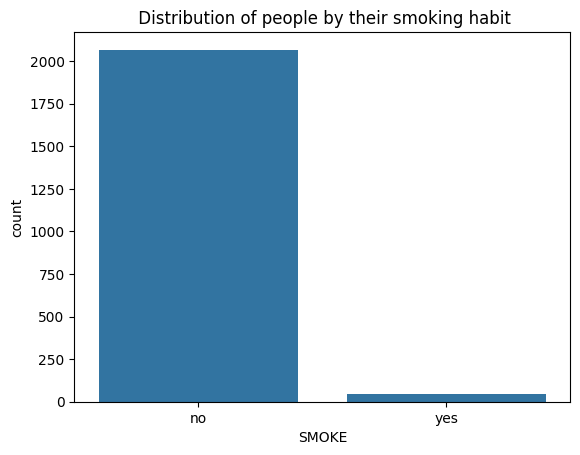

In [8]:
# Create a count plot to visualize the distribution of people based on their smoking habits
sns.countplot(x='SMOKE', data=df)
plt.title(" Distribution of people by their smoking habit")
plt.show()

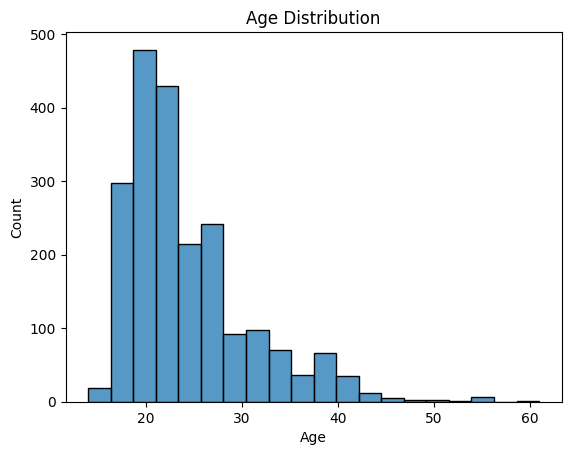

In [9]:
# Plot a histogram to visualize the age distribution in the dataset with 20 bins
sns.histplot(x='Age', data=df,bins = 20)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

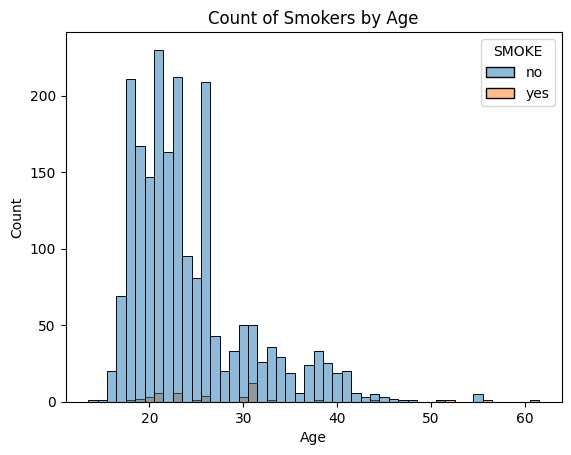

In [10]:
# Create a histogram to visualize the count of smokers by age.
# The 'hue' parameter distinguishes data based on the 'SMOKE' column.
sns.histplot(data=df, x='Age', hue='SMOKE', bins=10, discrete=True)
plt.title("Count of Smokers by Age")
plt.xlabel('Age')
plt.ylabel("Count")

plt.show()

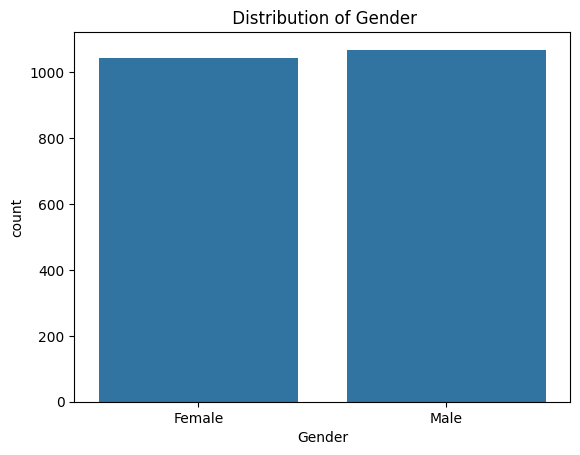

In [11]:
# Create a count plot to visualize the distribution of genders in the dataset
sns.countplot(x='Gender', data=df)
plt.title(" Distribution of Gender")
plt.show()

#**Data Pre-processing**

### Encoding categorical data

In [12]:
# Retrieve and display all column names of the DataFrame.
cols = df.columns
cols

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [13]:
# Extract and display the names of all numeric columns in the DataFrame.
num_cols = df._get_numeric_data().columns
num_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [14]:
# Extracting the categorical columns by deducting the numerical columns from the list of column names.
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['SCC',
 'FAVC',
 'MTRANS',
 'CAEC',
 'Gender',
 'SMOKE',
 'CALC',
 'family_history_with_overweight']

In [15]:
# Define a list of categorical columns that will undergo label encoding.
le_cat_cols =  ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
le_cat_cols

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [16]:
# Define a list of columns that will undergo One-Hot encoding.
ohe_cat_cols = list(set(cat_cols) - set(le_cat_cols))
ohe_cat_cols

['MTRANS', 'CALC', 'CAEC']

In [17]:
# Perform One-Hot Encoding on the categorical columns identified in 'ohe_cat_cols'.
ohe_encoded = pd.get_dummies(df, columns=ohe_cat_cols)

# Replace boolean values (True/False) with integers (1/0) in the resulting DataFrame.
df = ohe_encoded.replace({True: 1, False: 0})

<ipython-input-17-5ba4d6f135c3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = ohe_encoded.replace({True: 1, False: 0})


In [18]:
# Apply Label encoding to ("Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC") columns in the data frame.
label_encoder = LabelEncoder()
for col in le_cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
# Display the first five rows of the data frame after encoding the data.
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,1,0,0,0,0,1,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,1,0,0,0,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,1,0,0,1,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,1,0,1,0,0,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,1,0,0,0,1,0,0,0,1,0


In [20]:
# Display the dimensions of the Data set after doing encoding.
df.shape

(2111, 26)

### Feature Scaling

In [21]:
# Applied StandardScaler on the numerical values of the data set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
# Display first five rows of the data frame after appling StandardScaler.
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,1,0,0,0,0,1,0,0,1,0
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,1,0,0,0,1,0,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,1,0,0,1,0,0,0,0,1,0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0,1,0,1,0,0,0,0,1,0
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,1,0,0,0,1,0,0,0,1,0


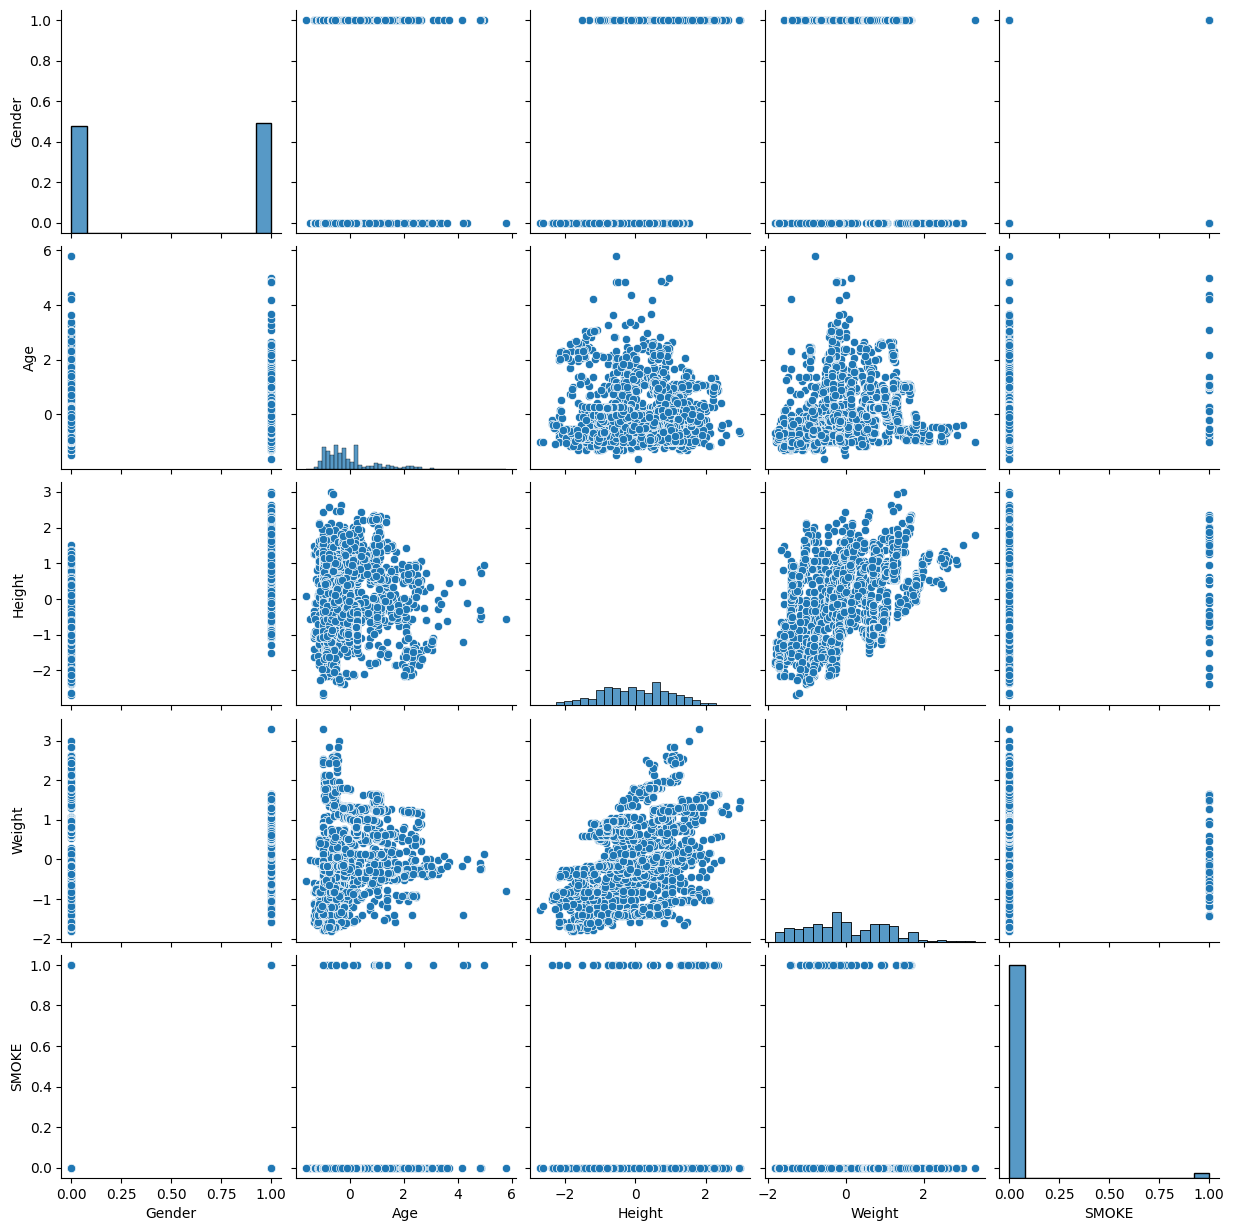

In [23]:
# Selecting specific columns from the dataframe and creating the pairplot using vars parameter
sns.pairplot(df, vars=["Gender", "Age", "Height", "Weight", "SMOKE"])


# Principal Component Analysis (PCA)

In [24]:
# Import PCA from scikit-learn library
from sklearn.decomposition import PCA

# Initialize PCA to reduce the dataset to 8 principal components
pca = PCA(n_components=8)

# Fit the PCA model to the data and transform the original dataset into 8 principal components
X_pca_8 = pca.fit_transform(df)

# Obtain the explained variance ratio for each of the 8 components
pca.explained_variance_ratio_

array([0.19713535, 0.16155745, 0.11495021, 0.1038871 , 0.09810488,
       0.08085375, 0.07537781, 0.04448615])

In [25]:
# Sum the total amount of explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.8763527040733524

# K-Means++ Model

### Using the elbow method to find the optimal number of clusters

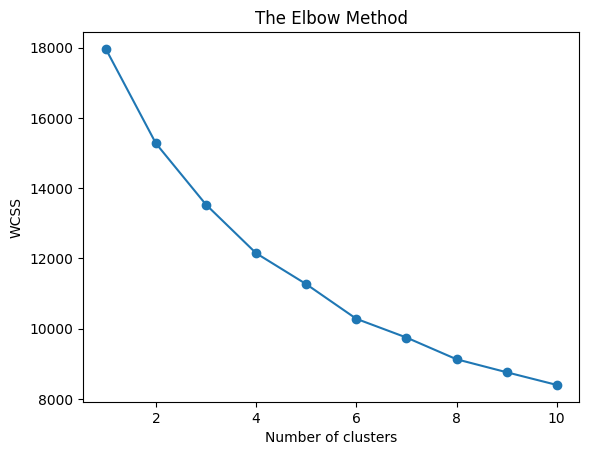

In [26]:
# Determine the optimal number of clusters for the KMeans clustering algorithm.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca_8)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans Clustering

In [27]:
# Initialize the KMeans model with 4 clusters using 'k-means++' for centroid initialization
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# Fit the KMeans model to the dataset and predict cluster labels for each data point
y_kmeans = kmeans.fit_predict(df)

In [28]:
# Reduce the PCA-transformed data to 2 principal components for easier visualization
pca_2 = PCA(n_components=2)

# Fit the PCA model to the 8-component dataset and transform it into 2 components
X_pca_2 = pca_2.fit_transform(X_pca_8)

### Visualizing k-means++ clusters in a 2D plot

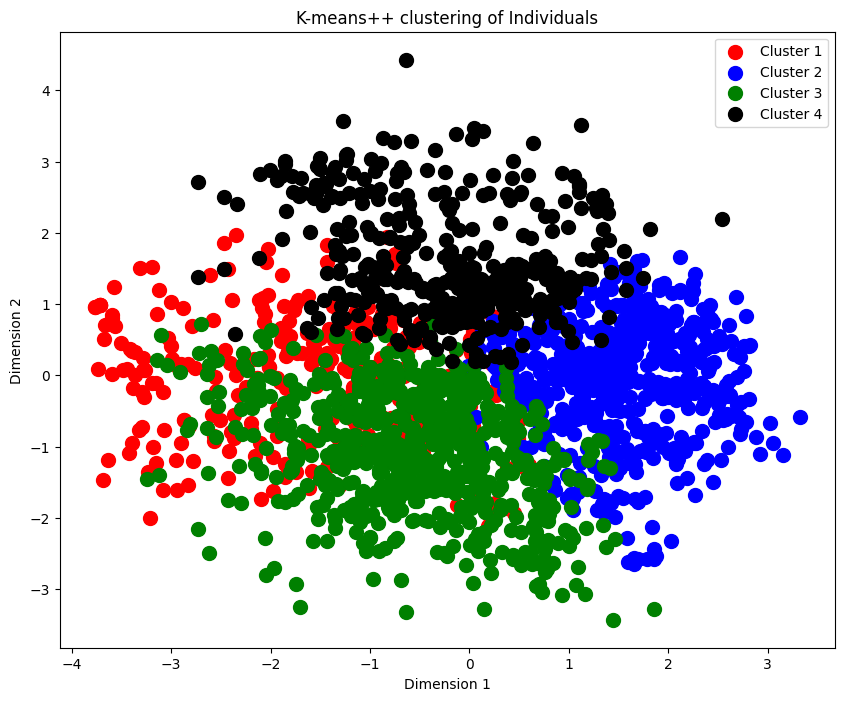

In [29]:
# Define colors for each cluster
colours = ['red', 'blue', 'green',"black"]

# Plot the 4 clusters in 2D using PCA components for visualization
plt.figure(figsize=(10,8))
for i in range(4):
  plt.scatter(X_pca_2[y_kmeans == i, 0], X_pca_2[y_kmeans == i, 1],
             s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('K-means++ clustering of Individuals')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Hierarchical Clustering Model

### Plot the dendrogram to find optimal number of the clusters.

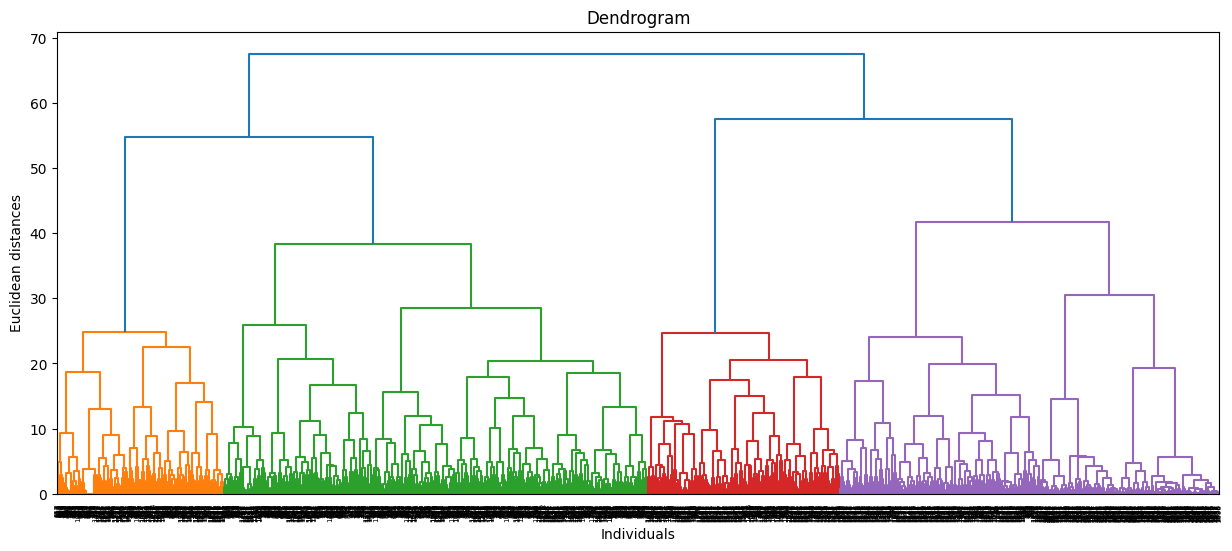

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X_pca_8, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Individuals')
plt.ylabel('Euclidean distances')
plt.show()

### Apply Agglomerative Clustering

In [31]:
# Import AgglomerativeClustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model with 4 clusters, using Euclidean distance and Ward's linkage
agglo = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward' )

# Fit the model to the PCA-transformed dataset and predict cluster labels for each data point
y_agglo = agglo.fit_predict(X_pca_8)


### Visualizing AgglomerativeClustering clusters in a 2D plot

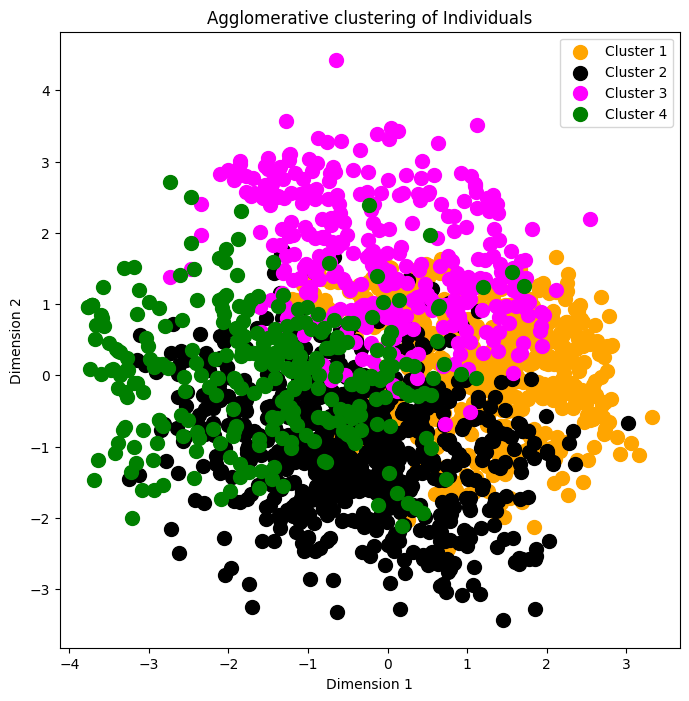

In [32]:
# Define colors for each cluster

colours = ["orange", "black", "magenta","green"]

# Plot the 4 clusters in 2D using PCA components for visualization
plt.figure(figsize=(8,8))
for i in range(4):
  plt.scatter(X_pca_2[y_agglo == i, 0], X_pca_2[y_agglo == i, 1],
              s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('Agglomerative clustering of Individuals')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Compare the performance of the two K-means++ and Agglomerative Clustering

In [33]:
# Fit the KMeans model to the data and predict cluster labels for each point in X
# The labels indicate which cluster each data point belongs to
kmeans_labels = kmeans.fit_predict(X_pca_8)

# Fit the AgglomerativeClustering model to the data and predict cluster labels for each point in X
# The labels indicate which cluster each data point belongs to
agglo_labels = agglo.fit_predict(X_pca_8)

In [34]:
# Calculate the silhouette score for KMeans++ clustering
kmeans_silhouette = silhouette_score(X_pca_8, kmeans_labels)

#Calculate the silhouette score for the AgglomerativeClustering model
agglo_silhouette = silhouette_score(X_pca_8, agglo_labels)

In [35]:
#Calculate the Davies-Bouldin Index for the KMeans model
kmeans_db = davies_bouldin_score(X_pca_8, kmeans_labels)

#Calculate the Davies-Bouldin Index for the AgglomerativeClustering model
agglo_db = davies_bouldin_score(X_pca_8, agglo_labels)

In [36]:
# Print the evaluation metrics for both clustering models:

print("KMeans++ Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("\nKMeans++ Davies-Bouldin Index:", kmeans_db)
print("Agglomerative Clustering Davies-Bouldin Index:", agglo_db)

KMeans++ Silhouette Score: 0.1640968124998371
Agglomerative Clustering Silhouette Score: 0.1587761322265986

KMeans++ Davies-Bouldin Index: 1.886078704569595
Agglomerative Clustering Davies-Bouldin Index: 1.9176582248373704


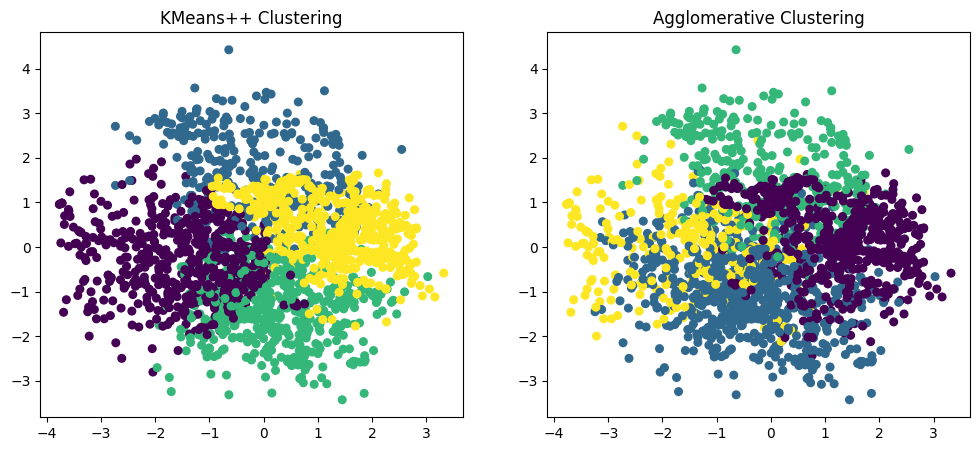

In [37]:
#Create a side-by-side comparison of the clustering results

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=kmeans_labels, cmap='viridis', s=30)
ax1.set_title("KMeans++ Clustering")

ax2.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=agglo_labels, cmap='viridis', s=30)
ax2.set_title("Agglomerative Clustering")

plt.show()